<ipython-input-1-97449a0e8db8>:23: RuntimeWarning: divide by zero encountered in double_scalars
  D[i, j] = (-1) ** (i - j) / np.sin((i - j) * np.pi / (2 * N))


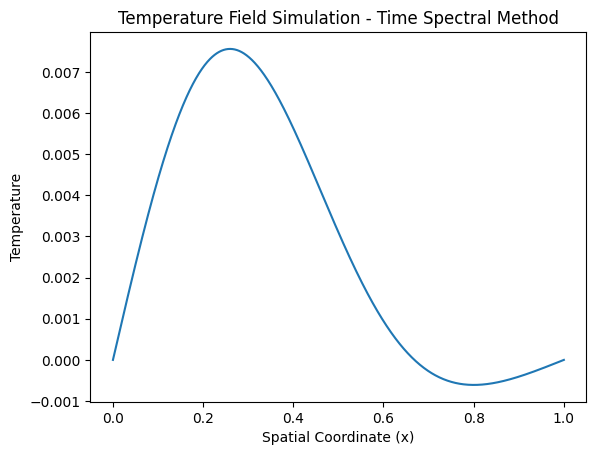

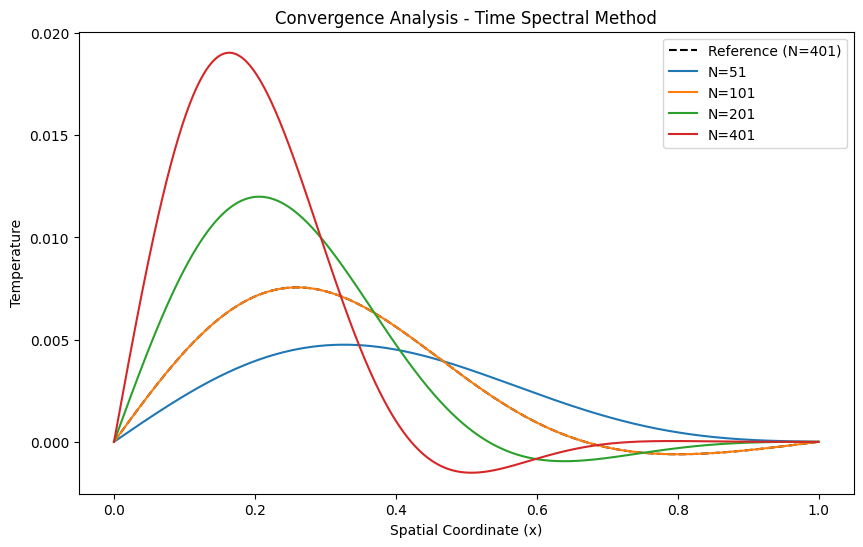

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

# Given parameters
k = 1  # Heat conduction coefficient
L = 1  # Spatial domain length
N = 101  # Number of equally spaced time instances (odd number)

# Create spatial grid
x = np.linspace(0, L, 1000)

# Spatial basis functions
phi = lambda n, x: np.sqrt(2 / L) * np.sin((n * np.pi * x) / L)

# Spectral differentiation matrix
D = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if i % 2 != j % 2:
            D[i, j] = 0
        else:
            D[i, j] = (-1) ** (i - j) / np.sin((i - j) * np.pi / (2 * N))

# Initial condition
u0 = np.sin(np.pi * x)  # Given boundary condition at t=0

# Time span
T = 1
t_values = np.linspace(0, T, N)

# Time spectral method
u_t = np.zeros_like(x)
for n in range(N):
    u_t += u0[n] * phi(n, x) * np.exp(-k * (np.pi * n / L) ** 2 * t_values[n])

# Plot the result
plt.plot(x, u_t)
plt.xlabel('Spatial Coordinate (x)')
plt.ylabel('Temperature')
plt.title('Temperature Field Simulation - Time Spectral Method')

#Verification and Convergence Analysis
def time_spectral_method(N):
    # ... (Previous code for the time spectral method)

    # Time spectral method
    u_t = np.zeros_like(x)
    for n in range(len(t_values)):  # Use the length of t_values instead of u0
        u_t += u0[n] * phi(n, x) * np.exp(-k * (np.pi * n / L) ** 2 * t_values[n])

    return u_t

# Parameters
k = 1  # Heat conduction coefficient
L = 1  # Spatial domain length
T = 1  # Total time span

# Vary the number of time instances (odd numbers for consistency)
N_values = [51, 101, 201, 401]

# Create a figure for comparison
plt.figure(figsize=(10, 6))

# Plot the reference solution (N = 401)
x_ref = np.linspace(0, L, 1000)
u_ref = time_spectral_method(N_values[-1])
plt.plot(x_ref, u_ref, label='Reference (N=401)', linestyle='--', color='black')

# Plot solutions for different N values
for N in N_values:
    x = np.linspace(0, L, 1000)
    t_values = np.linspace(0, T, N)
    u_t = time_spectral_method(N)
    plt.plot(x, u_t, label=f'N={N}')

plt.xlabel('Spatial Coordinate (x)')
plt.ylabel('Temperature')
plt.title('Convergence Analysis - Time Spectral Method')
plt.legend()
plt.show()